# Cell Anomaly Detection with Autoencoder

## Introduction

In this project, we aim to detect anomalies in cell images using an autoencoder. Autoencoders are a type of neural network commonly used for unsupervised learning tasks, such as dimensionality reduction and anomaly detection. For this project we use the autoencoder's loss function to determine whether a cell is infected with malaria

## Project Overview

1. **Dataset**: The dataset has been obtained from [kaggle](https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria).

2. **Data Preprocessing**: Normalize and preprocess the images to prepare them for training.

3. **Autoencoder Architecture**: Design the architecture of the autoencoder. Typically, an autoencoder consists of an encoder and a decoder. The encoder compresses the input data, while the decoder reconstructs the original input from the compressed representation.


In [ ]:
from tensorflow.keras.layers import Input , Dense , Conv2D , MaxPooling2D , UpSampling2D
from tensorflow.keras.models import Sequential
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator

SIZE = 128

In [3]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
SIZE =128 # size of input data
batch_size = 64 # size of our neural training batches
datagen = ImageDataGenerator(rescale=1./255)


In [43]:
train_generator = datagen.flow_from_directory('cell_images/train_uninfected/',
                                              target_size = (SIZE,SIZE),
                                              batch_size = batch_size,
                                              class_mode = 'input'
                                              
                                              
                                              
                                              
                                              )

Found 2916 images belonging to 1 classes.


In [59]:
anomaly__train_generator = datagen.flow_from_directory('cell_images/train_parasized/',
                                              target_size = (SIZE,SIZE),
                                              batch_size = batch_size,
                                              class_mode = 'input'
                                              
                                              
                                              
                                              
                                              )

Found 2518 images belonging to 1 classes.


In [60]:
anomaly_test_generator = datagen.flow_from_directory('cell_images/test_parasitized/',
                                              target_size = (SIZE,SIZE),
                                              batch_size = batch_size,
                                              class_mode = 'input'
                                              
                                              
                                              
                                              
                                              )

Found 1368 images belonging to 1 classes.


In [8]:
validation_generator = datagen.flow_from_directory('cell_images/test_uninfected',
                                              target_size = (SIZE,SIZE),
                                              batch_size = batch_size,
                                              class_mode = 'input'
                                              
                                              
                                              
                                              
                                              )

Found 1349 images belonging to 1 classes.


In [9]:
history = model.fit(
        train_generator,
        steps_per_epoch= 500 // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=75 // batch_size,
        shuffle = True) 

#Est time : 4-10 mins

Epoch 1/20
7/7 [==============================] - 14s 2s/step - loss: 0.0893 - mse: 0.0893 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 2/20
7/7 [==============================] - 13s 2s/step - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 3/20
7/7 [==============================] - 13s 2s/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 4/20
7/7 [==============================] - 13s 2s/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0131 - val_mse: 0.0131
Epoch 5/20
7/7 [==============================] - 12s 2s/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 6/20
7/7 [==============================] - 14s 2s/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 7/20
7/7 [==============================] - 14s 2s/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 8/20
7/7 [==============================] - 14s 2s/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0

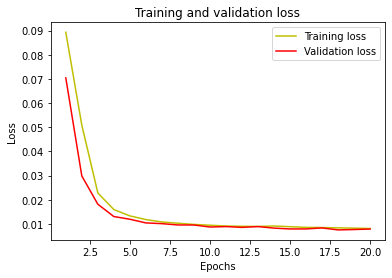

In [11]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


####  Model in action

15


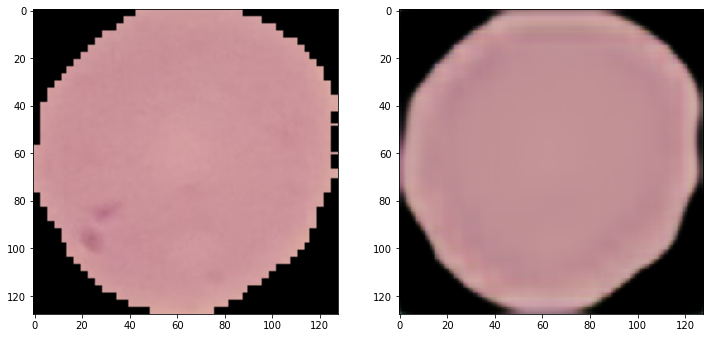

In [55]:

data_batch = []  #Capture all training batches as a numpy array
img_num = 0
print(train_generator.batch_index)
while img_num <= 2:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])  #Predict on the first batch of images
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

### Lets save the model

In [14]:
import time

model.save('models/autoencoder_v1')


INFO:tensorflow:Assets written to: models/autoencoder_v1\assets


#### Analysis of anomaly cells 

In [16]:
import tensorflow as tf
model = tf.keras.models.load_model('models/autoencoder_v1')


In [57]:
#defining tester function 

def loss_test (generator, images_count , attempts,model):
    data_batch = []  #Capture all training batches as a numpy array
    img_num = 0
    trials = 0
    losses= []
    total_count = 1
    while trials < attempts : 
        while img_num <= images_count :   #gets each generated batch of size batch_size
            data = generator.next()
            data_batch.append(data[0])
            img_num = img_num + 1
        loss = model.test_on_batch(data_batch[trials], data_batch[trials])
        losses.append(loss[1])
        total_count+=1
        img_num = 0
        trials+=1
    return losses

In [68]:
normal_loss = loss_test(validation_generator,10,30,model)
anomaly_loss = loss_test(anomaly__train_generator,10,30,model)



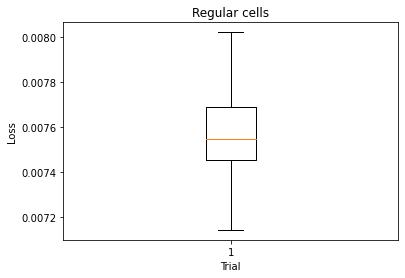

In [69]:

plt.boxplot(normal_loss , showfliers=False)
plt.title('Regular cells')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.show()

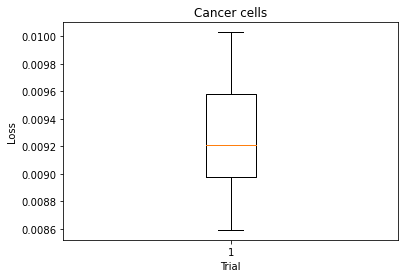

In [70]:

plt.boxplot(anomaly_loss , showfliers=False)
plt.title('Cancer cells')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.show()

<AxesSubplot:>

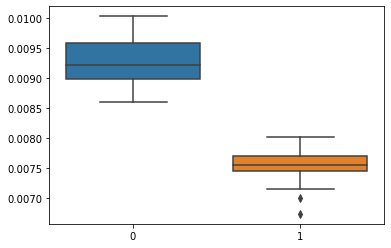

In [71]:
import seaborn as sns
sns.boxplot(data=[anomaly_loss , normal_loss])


In [72]:
model.evaluate(validation_generator)
model.evaluate(anomaly__train_generator)


40/40 [==============================] - 13s 317ms/step - loss: 0.0093 - mse: 0.0093


[0.00934441015124321, 0.00934441015124321]

### Model prediction and evaluation

In [73]:
# Based on the data lets set a RMSE limit
limit = 0.0082

In [74]:
normal_loss = loss_test(validation_generator,10,150,model)
anomaly_loss = loss_test(anomaly_test_generator,10,150,model)
# Estimated time - 5-10 mins

In [75]:
#cofusion matrix analysis 

tp = len([i for i in normal_loss if i < limit])
fp = len(normal_loss) - tp
tn = len([i for i in anomaly_loss if i > limit])
fn = len(anomaly_loss) - tn



In [76]:
print(tp , tn , fn , fp)

147 150 0 3


In [77]:
print((tp+tn)/(tp+tn+fn+fp))

0.99
